In [27]:
import matplotlib.pyplot as plt
import artm
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns

conn = sqlite3.connect('songs.db')
c = conn.cursor()
df = pd.read_sql('SELECT * FROM Splitted', conn)

/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:


In [6]:
full_batch_vectorizer = artm.BatchVectorizer(data_path='full_corpus.txt',
                                        data_format='vowpal_wabbit',
                                        target_folder='my_collection_batches')
chorus_batch_vectorizer = artm.BatchVectorizer(data_path='ch_corpus.txt',
                                        data_format='vowpal_wabbit',
                                        target_folder='my_collection_batches')
verse_batch_vectorizer = artm.BatchVectorizer(data_path='v_corpus.txt',
                                        data_format='vowpal_wabbit',
                                        target_folder='my_collection_batches')

In [86]:
def artm_results(batch_vectorizer):
    for i in range(2, 11):
        topic_names = ['topic_{}'.format(j) for j in range(i)]
        artm_model = artm.ARTM(topic_names=topic_names, cache_theta=True, dictionary=batch_vectorizer.dictionary,
                                scores=[artm.PerplexityScore(name='PerplexityScore', 
                                                             dictionary=batch_vectorizer.dictionary)],
                                regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta',
                                                                                tau=-0.2)])
        artm_model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
        artm_model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
        artm_model.scores.add(artm.TopTokensScore(name='top_tokens_score', num_tokens=5))
        artm_model.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.8))
        artm_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.2))
        artm_model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=2.5e+5))
        artm_model.num_document_passes = 1
        artm_model.scores.add(artm.TopTokensScore(name='TopTokensCoherenceScore'))
        artm_model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=25)
        artm_top_tokens = artm_model.score_tracker['top_tokens_score'].last_tokens
        
        
        print('ARTM Top Tokens')
        for topic_name in artm_model.topic_names:
            print(artm_top_tokens[topic_name])
            
        mtx = artm_model.get_theta()
        df = pd.read_sql('SELECT * FROM Splitted', conn)
        clusts = []
        for i in range(len(df)):
            clusts.append(np.argmax(mtx[i], axis=1))
        df['clusters'] = clusts
        x,y = 'genre', 'clusters'
        df = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
        sns.catplot(x=x,y='percent',hue=y,kind='bar', data=df)
        plt.show()
        

### Лирика целиком

ARTM Top Tokens
['know', 'like', 'let', 'baby', 'fuck']
['love', 'like', 'come', 'tell', 'genre']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

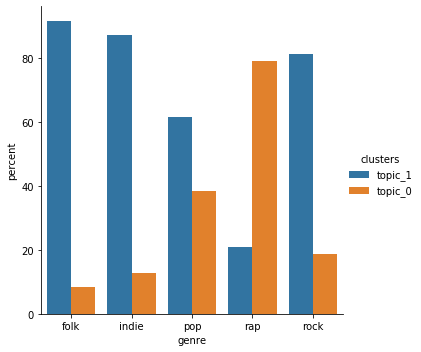

ARTM Top Tokens
['know', 'let', 'love', 'baby', 'fuck']
['love', 'feel', 'wanna', 'like', 'genre']
['like', 'come', 'tell', 'know', 'nigga']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

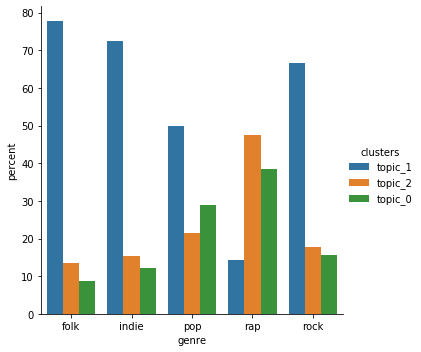

ARTM Top Tokens
['know', 'love', 'let', 'want', 'baby']
['like', 'wanna', 'genre', 'look', 'day']
['like', 'come', 'tell', 'time', 'nigga']
['fuck', 'bitch', 'like', 'shit', 'man']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

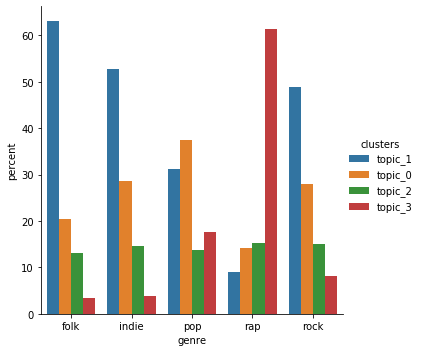

ARTM Top Tokens
['know', 'let', 'want', 'baby', 'love']
['love', 'wanna', 'genre', 'fall', 'day']
['come', 'time', 'tell', 'genre', 'find']
['way', 'man', 'good', 'tell', 'life']
['like', 'fuck', 'bitch', 'nigga', 'shit']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

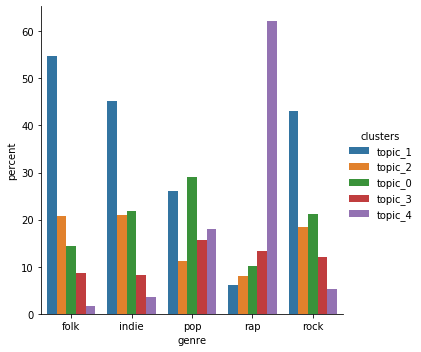

ARTM Top Tokens
['let', 'baby', 'want', 'girl', 'love']
['love', 'wanna', 'heart', 'fall', 'hold']
['come', 'time', 'tell', 'die', 'walk']
['way', 'good', 'life', 'tell', 'look']
['like', 'fuck', 'bitch', 'nigga', 'shit']
['know', 'need', 'bad', 'new', 'think']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

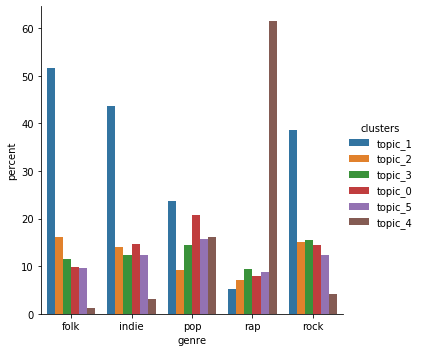

ARTM Top Tokens
['let', 'want', 'girl', 'run', 'mind']
['heart', 'hold', 'genre', 'fall', 'world']
['come', 'time', 'tell', 'die', 'leave']
['way', 'good', 'life', 'tell', 'night']
['like', 'fuck', 'bitch', 'nigga', 'shit']
['need', 'new', 'man', 'black', 'everybody']
['know', 'love', 'baby', 'time', 'wanna']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

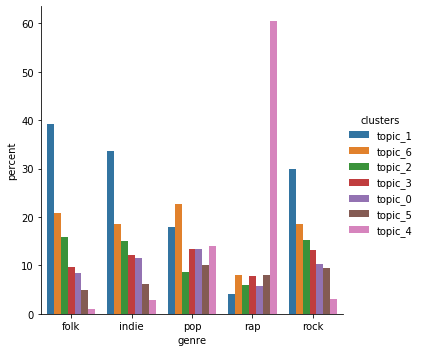

ARTM Top Tokens
['let', 'want', 'girl', 'run', 'mind']
['heart', 'hold', 'fall', 'wanna', 'genre']
['come', 'tell', 'time', 'die', 'leave']
['way', 'good', 'feel', 'night', 'life']
['like', 'bitch', 'fuck', 'nigga', 'shit']
['need', 'new', 'man', 'got', 'black']
['know', 'love', 'baby', 'home', 'time']
['day', 'gon', 'turn', 'live', 'use']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

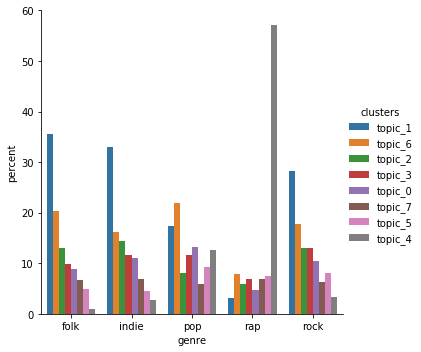

ARTM Top Tokens
['let', 'want', 'girl', 'run', 'mind']
['heart', 'hold', 'wanna', 'fall', 'world']
['come', 'tell', 'time', 'die', 'walk']
['feel', 'way', 'good', 'night', 'life']
['like', 'fuck', 'bitch', 'shit', 'fuckin']
['need', 'find', 'new', 'bad', 'black']
['know', 'love', 'baby', 'little', 'time']
['day', 'turn', 'light', 'live', 'lose']
['nigga', 'man', 'niggas', 'boy', 'real']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

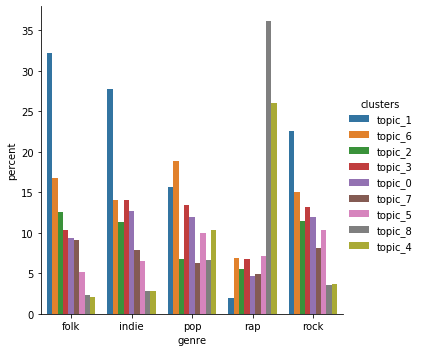

ARTM Top Tokens
['let', 'want', 'girl', 'run', 'mind']
['heart', 'hold', 'world', 'eye', 'dream']
['come', 'leave', 'die', 'walk', 'time']
['feel', 'way', 'good', 'night', 'life']
['like', 'fuck', 'bitch', 'shit', 'fuckin']
['need', 'new', 'find', 'black', 'everybody']
['know', 'baby', 'time', 'wanna', 'home']
['day', 'turn', 'light', 'lose', 'live']
['nigga', 'niggas', 'man', 'boy', 'real']
['love', 'tell', 'lie', 'low', 'use']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

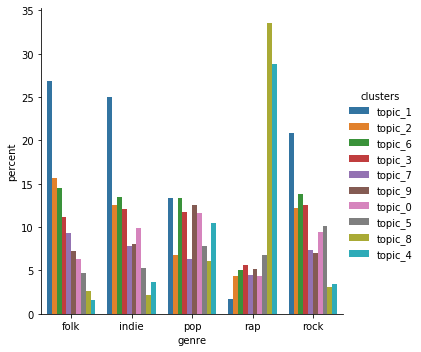

In [87]:
artm_results(full_batch_vectorizer)

### Припевы

ARTM Top Tokens
['know', 'like', 'let', 'baby', 'fuck']
['love', 'like', 'come', 'tell', 'genre']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

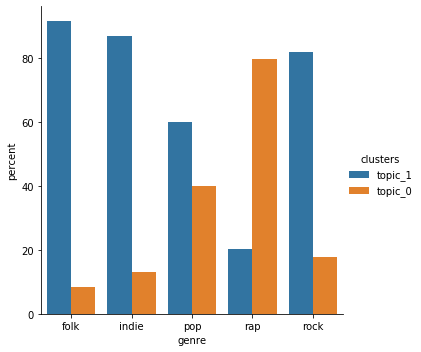

ARTM Top Tokens
['know', 'let', 'love', 'baby', 'fuck']
['love', 'wanna', 'like', 'genre', 'want']
['like', 'come', 'know', 'tell', 'time']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

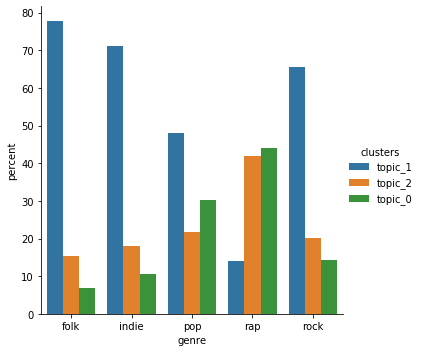

ARTM Top Tokens
['know', 'love', 'let', 'baby', 'want']
['like', 'wanna', 'genre', 'look', 'life']
['come', 'like', 'tell', 'time', 'right']
['fuck', 'bitch', 'like', 'shit', 'man']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

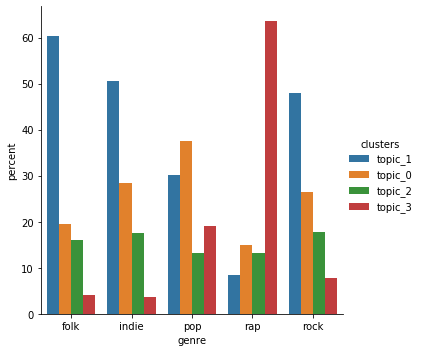

ARTM Top Tokens
['know', 'let', 'want', 'baby', 'girl']
['wanna', 'genre', 'fall', 'day', 'heart']
['come', 'time', 'tell', 'find', 'think']
['way', 'man', 'good', 'tell', 'life']
['like', 'love', 'fuck', 'bitch', 'nigga']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

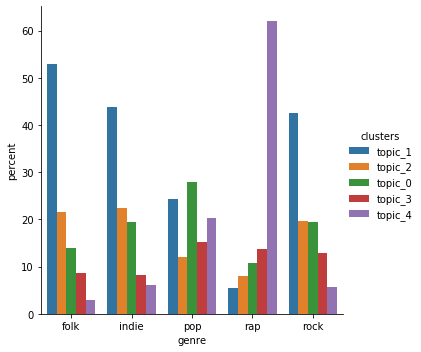

ARTM Top Tokens
['let', 'baby', 'want', 'girl', 'run']
['wanna', 'heart', 'fall', 'hold', 'genre']
['come', 'time', 'tell', 'die', 'walk']
['way', 'good', 'man', 'life', 'night']
['like', 'love', 'fuck', 'bitch', 'nigga']
['know', 'need', 'feel', 'bad', 'new']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

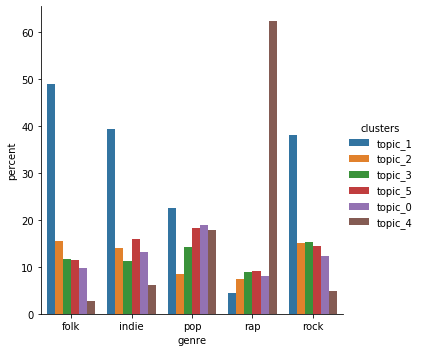

ARTM Top Tokens
['let', 'girl', 'want', 'run', 'mind']
['heart', 'look', 'hold', 'fall', 'live']
['come', 'tell', 'time', 'leave', 'die']
['way', 'good', 'life', 'night', 'tell']
['like', 'fuck', 'bitch', 'nigga', 'shit']
['need', 'new', 'man', 'find', 'bad']
['know', 'love', 'baby', 'wanna', 'feel']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

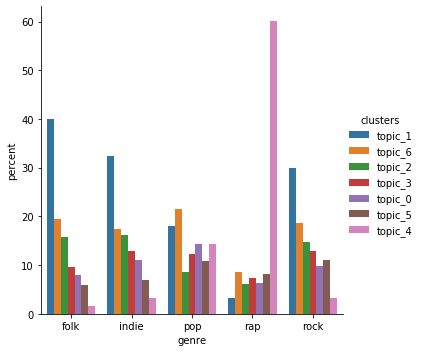

ARTM Top Tokens
['let', 'girl', 'want', 'run', 'mind']
['heart', 'look', 'hold', 'fall', 'eye']
['come', 'tell', 'time', 'die', 'walk']
['way', 'good', 'night', 'man', 'life']
['like', 'bitch', 'fuck', 'nigga', 'shit']
['need', 'new', 'feel', 'find', 'bad']
['know', 'love', 'baby', 'wanna', 'feel']
['day', 'gon', 'turn', 'wish', 'use']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

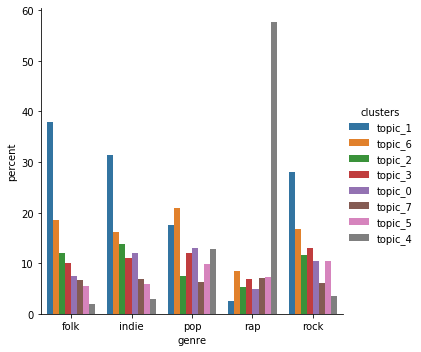

ARTM Top Tokens
['let', 'girl', 'want', 'run', 'mind']
['heart', 'hold', 'look', 'fall', 'eye']
['come', 'tell', 'die', 'time', 'walk']
['way', 'good', 'night', 'life', 'think']
['like', 'fuck', 'shit', 'bitch', 'nigga']
['need', 'feel', 'find', 'new', 'black']
['know', 'love', 'baby', 'wanna', 'time']
['day', 'turn', 'light', 'live', 'gon']
['man', 'niggas', 'boy', 'nigga', 'real']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

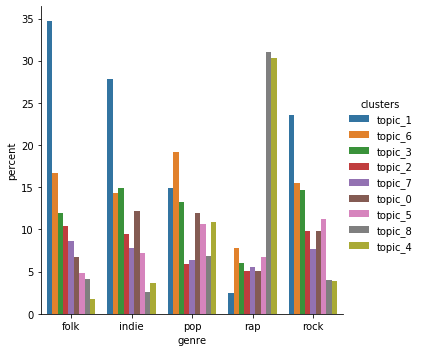

ARTM Top Tokens
['let', 'girl', 'run', 'mind', 'stop']
['want', 'heart', 'hold', 'eye', 'world']
['come', 'die', 'leave', 'walk', 'change']
['way', 'good', 'night', 'life', 'feel']
['like', 'fuck', 'bitch', 'shit', 'nigga']
['need', 'new', 'find', 'god', 'black']
['know', 'baby', 'time', 'wanna', 'home']
['day', 'turn', 'light', 'lose', 'end']
['man', 'niggas', 'boy', 'real', 'money']
['love', 'tell', 'fall', 'lie', 'low']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

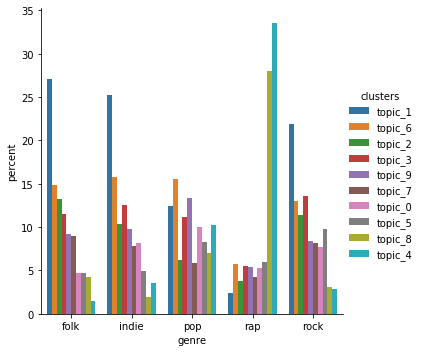

In [88]:
artm_results(chorus_batch_vectorizer)

### Куплеты

ARTM Top Tokens
['know', 'like', 'let', 'baby', 'fuck']
['love', 'like', 'come', 'tell', 'genre']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

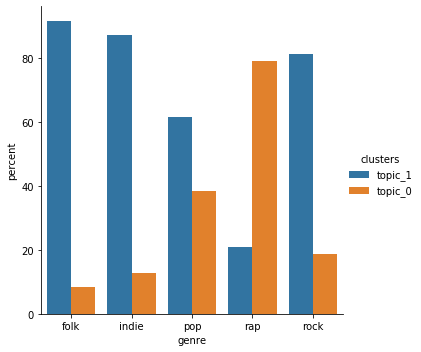

ARTM Top Tokens
['know', 'let', 'love', 'baby', 'fuck']
['love', 'feel', 'wanna', 'like', 'genre']
['like', 'come', 'tell', 'know', 'nigga']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

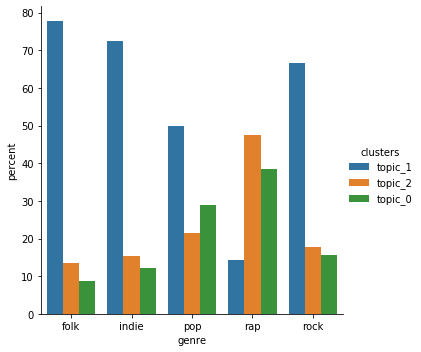

ARTM Top Tokens
['know', 'love', 'let', 'want', 'baby']
['like', 'wanna', 'genre', 'look', 'day']
['like', 'come', 'tell', 'time', 'nigga']
['fuck', 'bitch', 'like', 'shit', 'man']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

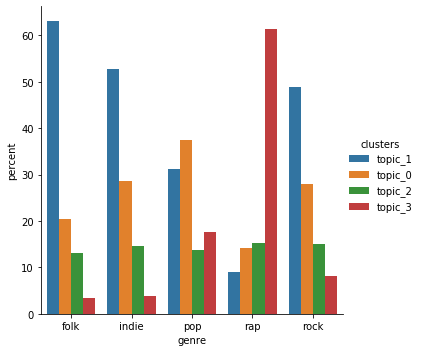

ARTM Top Tokens
['know', 'let', 'want', 'baby', 'love']
['love', 'wanna', 'genre', 'fall', 'day']
['come', 'time', 'tell', 'genre', 'find']
['way', 'man', 'good', 'tell', 'life']
['like', 'fuck', 'bitch', 'nigga', 'shit']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

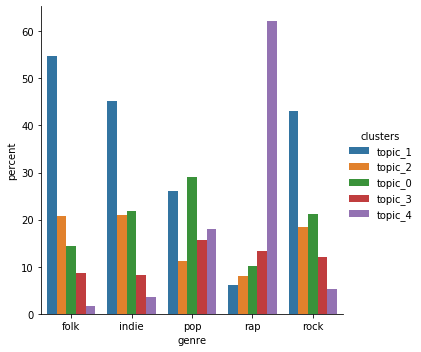

ARTM Top Tokens
['let', 'baby', 'want', 'girl', 'love']
['love', 'wanna', 'heart', 'fall', 'hold']
['come', 'time', 'tell', 'die', 'walk']
['way', 'good', 'life', 'tell', 'look']
['like', 'fuck', 'bitch', 'nigga', 'shit']
['know', 'need', 'bad', 'new', 'think']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

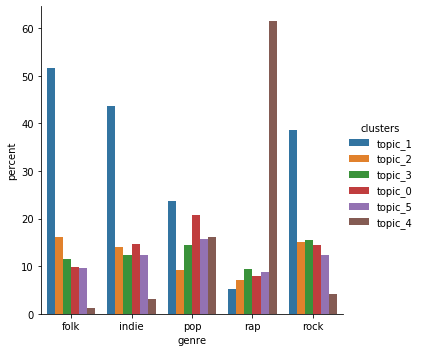

ARTM Top Tokens
['let', 'want', 'girl', 'run', 'mind']
['heart', 'hold', 'genre', 'fall', 'world']
['come', 'time', 'tell', 'die', 'leave']
['way', 'good', 'life', 'tell', 'night']
['like', 'fuck', 'bitch', 'nigga', 'shit']
['need', 'new', 'man', 'black', 'everybody']
['know', 'love', 'baby', 'time', 'wanna']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

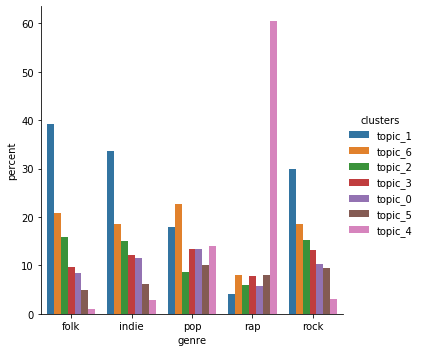

ARTM Top Tokens
['let', 'want', 'girl', 'run', 'mind']
['heart', 'hold', 'fall', 'wanna', 'genre']
['come', 'tell', 'time', 'die', 'leave']
['way', 'good', 'feel', 'night', 'life']
['like', 'bitch', 'fuck', 'nigga', 'shit']
['need', 'new', 'man', 'got', 'black']
['know', 'love', 'baby', 'home', 'time']
['day', 'gon', 'turn', 'live', 'use']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

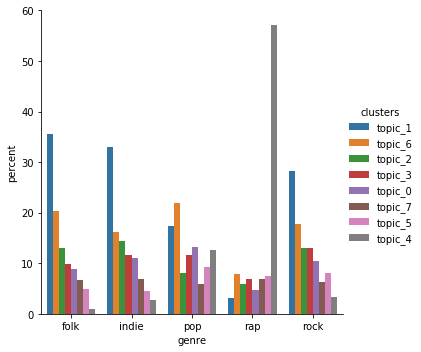

ARTM Top Tokens
['let', 'want', 'girl', 'run', 'mind']
['heart', 'hold', 'wanna', 'fall', 'world']
['come', 'tell', 'time', 'die', 'walk']
['feel', 'way', 'good', 'night', 'life']
['like', 'fuck', 'bitch', 'shit', 'fuckin']
['need', 'find', 'new', 'bad', 'black']
['know', 'love', 'baby', 'little', 'time']
['day', 'turn', 'light', 'live', 'lose']
['nigga', 'man', 'niggas', 'boy', 'real']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

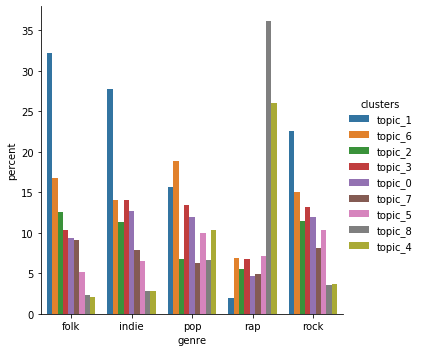

ARTM Top Tokens
['let', 'want', 'girl', 'run', 'mind']
['heart', 'hold', 'world', 'eye', 'dream']
['come', 'leave', 'die', 'walk', 'time']
['feel', 'way', 'good', 'night', 'life']
['like', 'fuck', 'bitch', 'shit', 'fuckin']
['need', 'new', 'find', 'black', 'everybody']
['know', 'baby', 'time', 'wanna', 'home']
['day', 'turn', 'light', 'lose', 'live']
['nigga', 'niggas', 'man', 'boy', 'real']
['love', 'tell', 'lie', 'low', 'use']


/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexes/base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/marynepo/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/internals/construction.py:588: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
/home/maryn

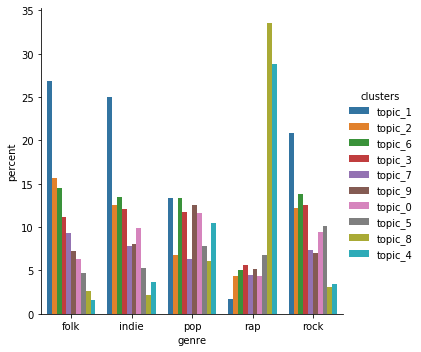

In [89]:
artm_results(verse_batch_vectorizer)